**Importing all the necessary libraries**

In [123]:
import os 
import numpy as np
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt
%matplotlib inline
import pathlib
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split


**Importing the dataset**

In [124]:
import warnings
warnings.filterwarnings('ignore')

from google.colab import files
uploaded = files.upload()

Saving data_g.csv to data_g (1).csv


In [125]:
import io
data = pd.read_csv(io.BytesIO(uploaded['data_g.csv']))
data.head()

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00060.au,0.430894,0.196222,1946.565652,1979.909934,3955.867746,0.097454,-67.770980,111.704184,-34.646105,61.334896,0.050252,30.560614,-12.701725,21.159567,-13.131145,16.282294,-6.335245,12.295832,-12.477988,1.681278,-5.142068,4.644002,-6.919217,1.040718,-4.736871,-0.660037,blues
1,blues.00082.au,0.338896,0.251350,2141.461656,2168.015560,4627.997015,0.105151,-29.362093,108.667950,-25.573165,38.429470,-18.325091,21.781096,-25.161657,22.387048,-17.604127,14.660119,-12.078506,5.456504,-7.687713,7.410600,-11.319177,7.229288,-9.466552,1.930059,-6.328476,-1.304812,blues
2,blues.00030.au,0.263016,0.170081,1379.081742,2004.000850,3015.831764,0.039376,-206.987590,117.781468,23.256245,28.294068,-1.099598,18.864939,-21.953711,17.855118,-25.583357,2.128552,-17.789054,-8.015467,-17.616342,-8.138554,-8.646157,-15.538988,-15.331506,-9.664872,-10.103310,-17.835100,blues
3,blues.00007.au,0.307921,0.131785,1451.754147,1577.369917,2955.348796,0.061435,-179.395447,136.459244,-26.656359,39.988027,5.289679,10.924427,-20.561889,8.513764,-11.356908,-3.469077,-8.414554,-6.954827,-3.544535,-8.051242,-8.959537,-8.424337,-10.558885,-10.788159,-4.693749,-8.638613,blues
4,blues.00064.au,0.332480,0.117413,2553.232415,2280.128669,5148.102203,0.146852,-85.150250,88.806722,-16.322611,59.224516,-35.990242,14.385730,-22.308612,9.647323,-14.820339,11.177997,-14.804457,8.478453,-19.590226,6.413210,-13.779667,6.112037,-13.154644,3.933456,-7.615454,3.752626,blues


In [126]:
data.describe()

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.378656,0.130929,2201.834226,2242.559613,4571.702159,0.103637,-144.479173,99.552199,-8.921949,36.293063,-1.146627,14.634083,-5.129624,10.119876,-6.995752,7.730251,-6.021121,4.471604,-4.797232,1.781547,-3.870275,1.147988,-3.967431,0.507303,-2.328779,-1.094875
std,0.081689,0.065685,715.961347,526.337663,1574.770035,0.041834,100.235661,31.331904,21.695015,16.666987,12.222555,11.840802,9.941638,10.464090,8.284181,7.937977,6.819018,6.717312,6.170919,5.009489,4.874423,4.579110,4.550650,3.869088,3.755574,3.837561
min,0.171782,0.005276,569.930721,897.994319,749.062137,0.021701,-552.064063,-1.527148,-89.901142,-18.768461,-38.903451,-28.424546,-32.933588,-24.947537,-31.653059,-12.051190,-28.052265,-15.805227,-27.542309,-12.598773,-17.545474,-15.693589,-17.227765,-11.975698,-18.504188,-19.935203
25%,0.319641,0.086625,1627.793931,1907.136505,3380.956639,0.070281,-200.695133,76.811480,-24.223791,24.107395,-9.974552,5.097782,-12.870050,1.609752,-13.249849,1.621692,-10.966826,-0.551576,-9.363372,-1.640080,-7.164838,-1.857098,-7.194297,-2.003979,-4.670281,-3.368000
50%,0.383075,0.122448,2209.468780,2221.408983,4658.671830,0.099539,-120.206072,98.452551,-10.716073,36.957074,-0.015239,15.007553,-5.717005,9.663922,-7.512299,7.151456,-5.920161,3.891842,-4.199810,1.879424,-3.614473,1.211944,-4.059109,0.669788,-2.391261,-1.155198
75%,0.435974,0.175793,2691.969702,2578.474352,5534.197785,0.132007,-73.895019,119.893638,5.505793,48.212826,7.920911,23.857726,2.974185,18.708671,-0.383367,14.399350,-1.004241,9.706133,-0.161017,5.155264,-0.323536,4.350694,-0.842968,3.112518,0.149070,1.303739
max,0.663573,0.398012,4434.439444,3509.578677,8676.405868,0.274829,42.034587,193.096518,56.666090,80.691273,31.461661,45.173178,21.835769,49.018887,19.129207,27.216746,17.421038,23.037571,13.054333,18.161663,12.357588,13.468803,11.489994,15.379257,14.686910,15.368966


In [127]:
df1 = data.drop(columns=['filename'])

In [128]:
X = df1.drop(columns = ["label"])
y = df1.iloc[:,-1]
y_unique = y.unique()
print("Number of Genre Categories :", len(y_unique))

Number of Genre Categories : 10


In [129]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [130]:
scaler = StandardScaler()
X=scaler.fit_transform(np.array(X, dtype=float))


In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape,y_train.shape, X_test.shape, y_test.shape

((800, 26), (800,), (200, 26), (200,))

In [132]:
X_train

array([[-0.04832823, -0.31122036,  0.19368085, ...,  1.46147716,
        -1.4262819 , -0.97965464],
       [-0.56659093,  0.03438175,  1.07144893, ..., -0.99003814,
         0.70769363, -0.75097179],
       [ 0.34623199, -0.61551723,  0.70662787, ...,  1.10709876,
        -2.49121966,  1.05693498],
       ...,
       [-0.10271342, -0.46261043, -0.03870523, ...,  0.53837031,
         0.99527075,  0.86804855],
       [ 0.18245735,  1.7239756 ,  0.41733389, ..., -0.81309446,
        -0.65681761, -0.98260259],
       [-1.95521229, -1.73902905, -1.94263305, ...,  0.19490066,
         1.11989957, -0.14681367]])

In [133]:

X_val = X_train[:100]
X_train_p = X_train[100:]
y_val = y_train[:100]
y_train_p = y_train[100:]


In [134]:
print("X_train:",X_train.shape)
print("X_train_p:",X_train_p.shape)
print("y_train:",y_train.shape)
print("y_train_p:",y_train_p.shape)
print("X_val:",X_val.shape)
print("Y_val:", y_val.shape)


X_train: (800, 26)
X_train_p: (700, 26)
y_train: (800,)
y_train_p: (700,)
X_val: (100, 26)
Y_val: (100,)


**Model**

In [140]:
import keras
model = keras.Sequential([
          #1st input layer
      keras.layers.Dense(512, activation='relu', input_shape = (X_train.shape[1],)),
        #1st hidden layer
      keras.layers.Dense(256, activation="relu", kernel_regularizer=keras.regularizers.l1_l2(0.001)),
      keras.layers.Dropout(0.3),
        #2nd hidden layer
        keras.layers.Dense(164, activation="relu",  kernel_regularizer=keras.regularizers.l1_l2(0.001)),
        keras.layers.Dropout(0.3),
      
      
        #output layer
        keras.layers.Dense(10, activation='softmax')

                          
])

In [141]:
model.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics='accuracy')
model.summary()



Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 512)               13824     
_________________________________________________________________
dense_45 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_22 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_46 (Dense)             (None, 164)               42148     
_________________________________________________________________
dropout_23 (Dropout)         (None, 164)               0         
_________________________________________________________________
dense_47 (Dense)             (None, 10)                1650      
Total params: 188,950
Trainable params: 188,950
Non-trainable params: 0
_______________________________________________

In [142]:
history = model.fit(X_train_p, y_train_p, validation_data=(X_val, y_val), epochs=200, batch_size=256, verbose=2)
history

Epoch 1/200
3/3 - 1s - loss: 15.7151 - accuracy: 0.1329 - val_loss: 14.9919 - val_accuracy: 0.2400
Epoch 2/200
3/3 - 0s - loss: 14.7025 - accuracy: 0.3157 - val_loss: 14.0719 - val_accuracy: 0.2500
Epoch 3/200
3/3 - 0s - loss: 13.7699 - accuracy: 0.3343 - val_loss: 13.2048 - val_accuracy: 0.2700
Epoch 4/200
3/3 - 0s - loss: 12.8931 - accuracy: 0.3443 - val_loss: 12.3897 - val_accuracy: 0.2700
Epoch 5/200
3/3 - 0s - loss: 12.0632 - accuracy: 0.3543 - val_loss: 11.6062 - val_accuracy: 0.2900
Epoch 6/200
3/3 - 0s - loss: 11.3222 - accuracy: 0.3729 - val_loss: 10.8527 - val_accuracy: 0.3000
Epoch 7/200
3/3 - 0s - loss: 10.5770 - accuracy: 0.4000 - val_loss: 10.1504 - val_accuracy: 0.3300
Epoch 8/200
3/3 - 0s - loss: 9.8868 - accuracy: 0.4343 - val_loss: 9.4909 - val_accuracy: 0.3200
Epoch 9/200
3/3 - 0s - loss: 9.2676 - accuracy: 0.4514 - val_loss: 8.8802 - val_accuracy: 0.3500
Epoch 10/200
3/3 - 0s - loss: 8.6552 - accuracy: 0.4357 - val_loss: 8.3108 - val_accuracy: 0.3600
Epoch 11/200
3/

In [143]:
test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(test_accuracy[1])

0.6200000047683716


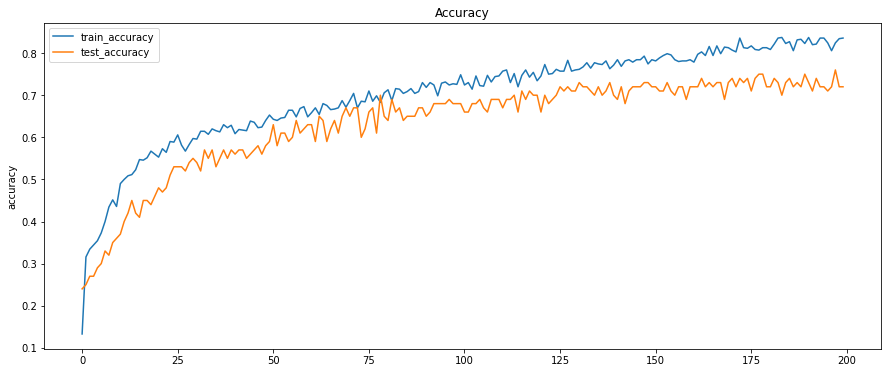

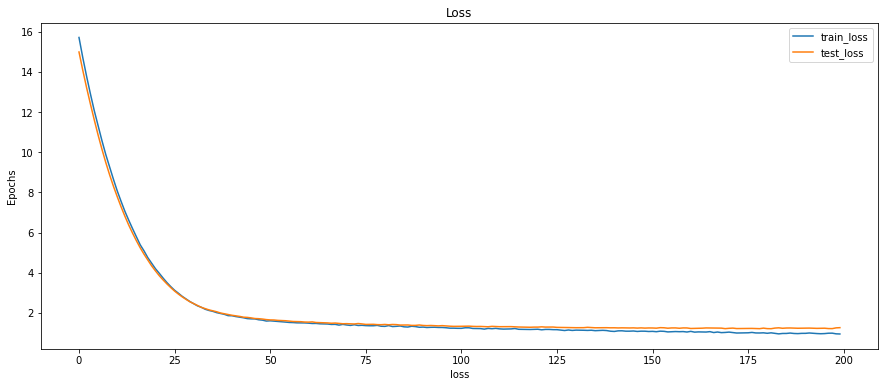

In [144]:
plt.figure(figsize=(15, 6))
plt.plot(history.history['accuracy'], label = "train_accuracy")
plt.plot(history.history['val_accuracy'], label = "test_accuracy")
plt.ylabel("accuracy")
plt.legend()
plt.title("Accuracy")

plt.figure(figsize = (15,6))
plt.plot(history.history['loss'], label = "train_loss")
plt.plot(history.history['val_loss'], label = "test_loss")
plt.xlabel("loss")
plt.ylabel("Epochs")
plt.title("Loss")
plt.legend()

In [145]:
!pip3 install pydub
!apt-get install ffmpeg
import pyglet
import pydub
import wave
from google.colab import files
from scipy.io import wavfile as wv
from pydub import AudioSegment


Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:3.4.8-0ubuntu0.2).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


**Uploading a Audio File to Classify its Genre**

In [146]:
file = files.upload()

Saving hiphop.00090.wav to hiphop.00090.wav


In [147]:

!pip install ipython


In [148]:
from IPython.display import Audio
Audio("hiphop.00090.wav", autoplay=True)


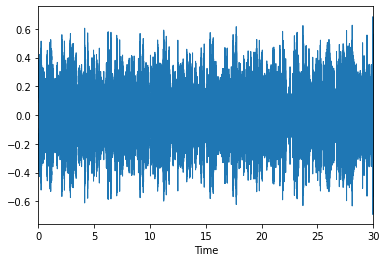

In [149]:
f = "hiphop.00090.wav"
Signal, sr = librosa.load(f, sr=22050)
librosa.display.waveplot(Signal, sr=sr)

n_fft=np.fft.fft(Signal)

Here Sample Rate defines how many times per second a sample is defined 

**Extracting all the features from an audio file**

In [150]:
chroma_stft = np.mean(librosa.feature.chroma_stft(Signal, sr=sr, n_fft=2048, hop_length=512).T)
rmse = np.mean(librosa.feature.rms(Signal, hop_length=512).T)
spectral_centroid = np.mean(librosa.feature.spectral_centroid(Signal, sr=sr,n_fft=2048,hop_length=512).T)
spectral_bandwidth = np.mean(librosa.feature.spectral_bandwidth(Signal,sr=sr, n_fft=2048,hop_length=512).T)
rolloff = np.mean(librosa.feature.spectral_rolloff(Signal,sr=sr,n_fft=2048,hop_length=512).T)
zero_crossing_rate = np.mean(librosa.feature.zero_crossing_rate(Signal, frame_length=2048,hop_length=512).T)
print('chrom_stft:',chroma_stft)
print('rmse:',rmse)
print("spectral_centroid:",spectral_centroid)
print("spectral_bandwidth:",spectral_bandwidth)
print("rolloff:",rolloff)
print("zero_crossig_rate:",zero_crossing_rate)

chrom_stft: 0.4825765
rmse: 0.109222814
spectral_centroid: 2272.772901637457
spectral_bandwidth: 2327.284514366882
rolloff: 4964.435848227233
zero_crossig_rate: 0.10443931868716164


In [151]:
real_mfcc=[]
sr=22050
hop_length=512
duration=30 #seconds
Sample_per_track = sr * duration
num_segments=20
samples_each_segment = int(Sample_per_track / num_segments)

for s in range(num_segments):

  start_sample= samples_each_segment * s
  finish_sample= start_sample +  samples_each_segment

  mfcc = librosa.feature.mfcc(Signal[start_sample:finish_sample], sr=sr,n_fft=2048,
                              n_mfcc=20, hop_length=512)
  mfcc = mfcc.T
  mean_mfcc = np.mean(mfcc)
  real_mfcc.append(mean_mfcc)
  print(f'Mfcc {s+1}: {mean_mfcc}')

Mfcc 1: 4.39345645904541
Mfcc 2: 3.5274181365966797
Mfcc 3: 2.4625027179718018
Mfcc 4: 2.3092098236083984
Mfcc 5: 2.825045347213745
Mfcc 6: 1.8467984199523926
Mfcc 7: 2.8444278240203857
Mfcc 8: 4.175079345703125
Mfcc 9: 2.5522143840789795
Mfcc 10: 2.4682798385620117
Mfcc 11: 2.333315372467041
Mfcc 12: 3.6566383838653564
Mfcc 13: 1.8104820251464844
Mfcc 14: 2.462756633758545
Mfcc 15: 3.15141224861145
Mfcc 16: 2.9349796772003174
Mfcc 17: 1.9928399324417114
Mfcc 18: 3.2843847274780273
Mfcc 19: 4.663292407989502
Mfcc 20: 2.399146795272827


**Creating a Dataframe for the Features extracted from the sample audio file**


In [152]:
frame = {'chroma_stft':chroma_stft, 'rmse':rmse, 'spectral_centroid':spectral_centroid,'spectral_bandwidth':spectral_bandwidth,
         'rolloff':rolloff,'zero_crossing_rate':zero_crossing_rate,'mfcc1':real_mfcc[0],'mfcc2':real_mfcc[1],'mfcc3':real_mfcc[2],'mfcc4':real_mfcc[3],'mfcc5':real_mfcc[4],'mfcc6':real_mfcc[5],'mfcc7':real_mfcc[6],'mfcc8':real_mfcc[7],'mfcc9':real_mfcc[8],'mfcc10':real_mfcc[9],'mfcc11':real_mfcc[10],'mfcc12':real_mfcc[11],'mfcc13':real_mfcc[12],
         'mfcc14':real_mfcc[13],'mfcc15':real_mfcc[14],'mfcc16':real_mfcc[15],'mfcc17':real_mfcc[16],'mfcc18':real_mfcc[17],'mfcc19':real_mfcc[18],'mfcc20':real_mfcc[19], }

In [153]:
df2 = pd.DataFrame(frame, index=[0])
df2

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
0,0.482576,0.109223,2272.772902,2327.284514,4964.435848,0.104439,4.393456,3.527418,2.462503,2.30921,2.825045,1.846798,2.844428,4.175079,2.552214,2.46828,2.333315,3.656638,1.810482,2.462757,3.151412,2.93498,1.99284,3.284385,4.663292,2.399147


**A function to calculate the euclidean Distance between the Features extracted and that with the Dataset**

In [154]:

def euclidian_distance(x,w, cols=['chroma_stft', 'rmse', 'spectral_centroid', 'spectral_bandwidth',	'rolloff','zero_crossing_rate',	'mfcc1',	'mfcc2',	'mfcc3',	'mfcc4',	'mfcc5',	'mfcc6',	'mfcc7',	'mfcc8',	'mfcc9',	'mfcc10',	'mfcc11',	'mfcc12',	'mfcc13',	'mfcc14',	'mfcc15',	'mfcc16',	'mfcc17',	'mfcc18',	'mfcc19',	'mfcc20']):
  
  dist=np.linalg.norm(w[cols].values - x[cols].values, axis=1)
  
  return dist
  
euclidian_distance(df1,df2)

array([1126.26305185,  416.43945428, 2182.56803216, 2308.39408253,
        371.04089132, 1686.16875525,  312.10451836, 2686.57585536,
        877.96754129,  406.87531956, 2754.90284737,  226.6928274 ,
       2610.48955253,  306.11534131,  809.41643991,  291.4727703 ,
       1721.12918849, 3125.68357144,  174.32133581, 3066.93969238,
       1280.64666458, 1387.4945926 , 1198.05467116, 3752.37970618,
        215.84915624,  821.30494079,  864.83208964, 2463.27592766,
       2828.4945442 ,  197.62057122, 3096.42850618, 3215.04275731,
       1579.27629485, 1949.44067476,  708.83252653,  304.18781971,
       3423.69876271, 2368.05988587,  369.48504532, 3222.11863433,
       4596.3912396 ,  366.66295661, 1352.09154507, 2045.24576721,
       2927.52157254, 1004.81390481, 2311.11319573,  464.94480471,
       2507.29648743, 2142.11648257, 1688.50078528, 2116.7501826 ,
       1643.53597554, 3965.80068837, 2203.15048344, 1183.4140584 ,
       1309.97616346, 2204.9245741 , 2193.95689316,  901.89703

**Getting the nearest neighbors and classifying the genre of the sample audio file**

In [155]:
def genre():
  num_neighbours=5
  euclidian=[]
  r = df1.iloc[:,-1]
  for m in r:
    distance = euclidian_distance(df1,df2)
  distanceclass = list((zip(distance,r)))
  sorted_distance = sorted(distanceclass, key = lambda x:x[0])
  euclidian.append(sorted_distance)
  

  neighbors=[]
  for i in range(num_neighbours):
    neighbors.append(euclidian[0][i])
    value,label = zip(*neighbors)



    counted_classes = {"hiphop":label.count("hiphop"),"jazz": label.count("jazz"), "blues":label.count("blues"), "disco":label.count("disco"), "classical":label.count("classical"), "metal":label.count("metal"),"rock": label.count("rock"), "reggae":label.count("reggae"),"country": label.count("country"),"pop": label.count("pop")}
    label_key_list = list(counted_classes.keys())
    label_value_list = list(counted_classes.values())
    maximum_no_classes = max(counted_classes.values())
  #return neighbors, label_key_list[label_value_list.index(maximum_no_classes)]

  k = [i[1] for i in neighbors]
  if maximum_no_classes>2:
    print(f' The Music Genre is : {label_key_list[label_value_list.index(maximum_no_classes)]}')
  else:
    print("The Music Genre is :", k[0])
genre()

The Music Genre is : disco


**Genre Classified by the model**

In [156]:
class_audio= model.predict_classes(df2)
Genre_audio = encoder.inverse_transform(class_audio)
Genre_audio

array(['disco'], dtype=object)